# Introduction to Wavelet Transform

## What is a Wavelet?

At a fundamental level, a wavelet is a small wave. The term "small" is used to denote that it has limited duration. Unlike sinusoids, which extend from -∞ to +∞, wavelets are localized in time, giving them unique properties ideal for certain application

Mathematically, a wavelet must satisfy the following condition:s

.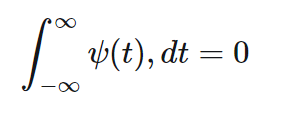


## Continuous Wavelet Transform (CWT)

The Continuous Wavelet Transform (CWT) allows us to examine a signal at different scales and positions. Mathematically, it's represented as: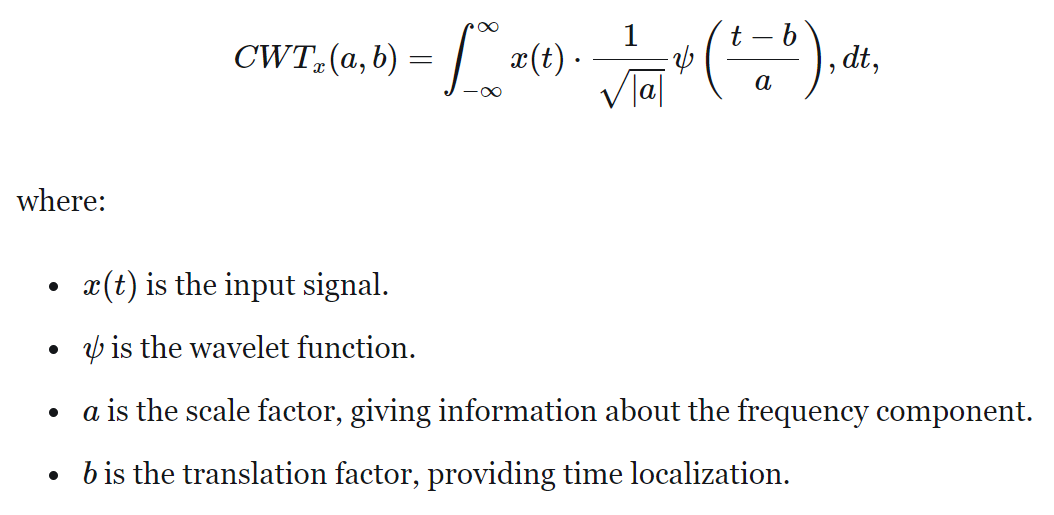
acteristics.


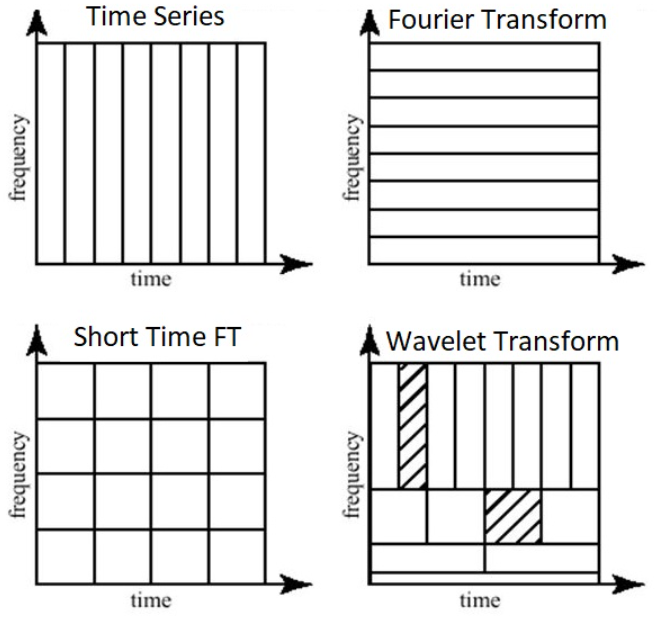

## Discrete Wavelet Transform (DWT)

While the Continuous Wavelet Transform (CWT) is continuous in nature, in the digital realm, we often work with discrete signals. The Discrete Wavelet Transform (DWT) provides a computationally efficient method to analyze signals at various resolutions.

The DWT decomposes a signal into two sets of coefficients: approximation coefficients ($A$) and detail coefficients ($D$). This decomposition is achieved using two sets of functions: scaling functions ($\phi$) and wavelet functions ($\psi$).
i$).



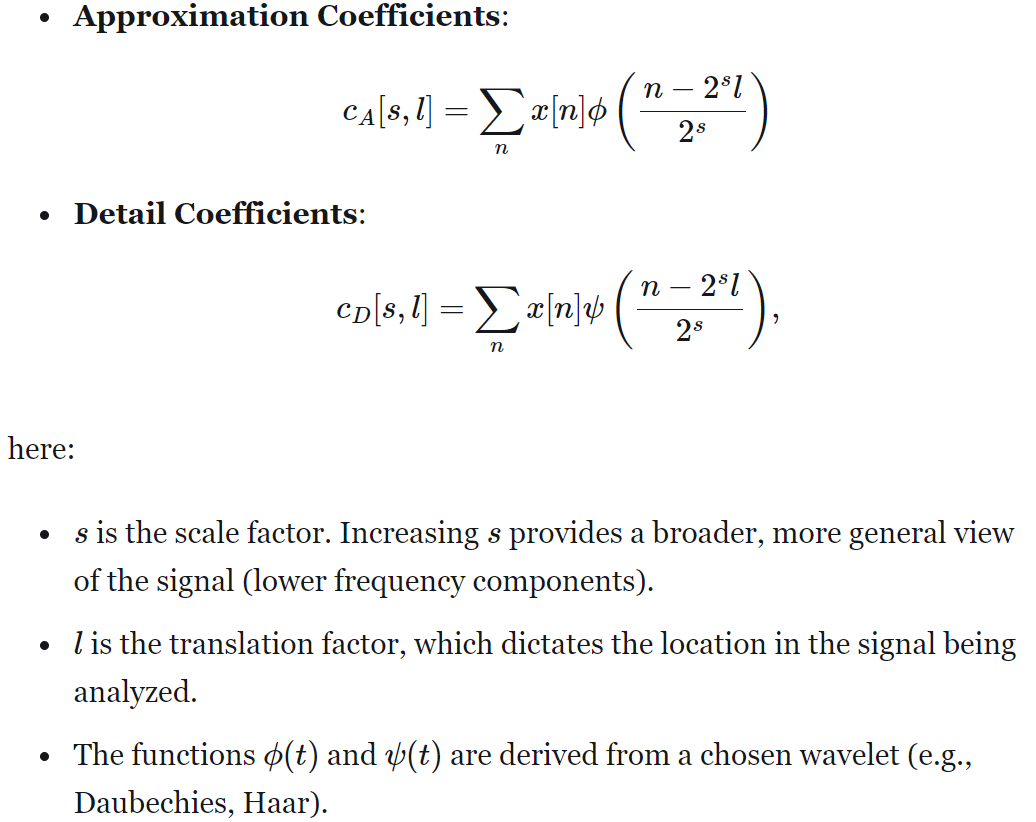

# Wavelet Transform in Python: Practical Examples

Let's dive into some code. We'll use the PyWavelets (`pywt`) library in Python to demonstrate the Wavelet Transform.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

## 1. Simple Signal Analysis using DWT

Consider a simple signal composed of two sinusoids of different frequencies. We'll use the Discrete Wavelet Transform (DWT) to analyze this signal.


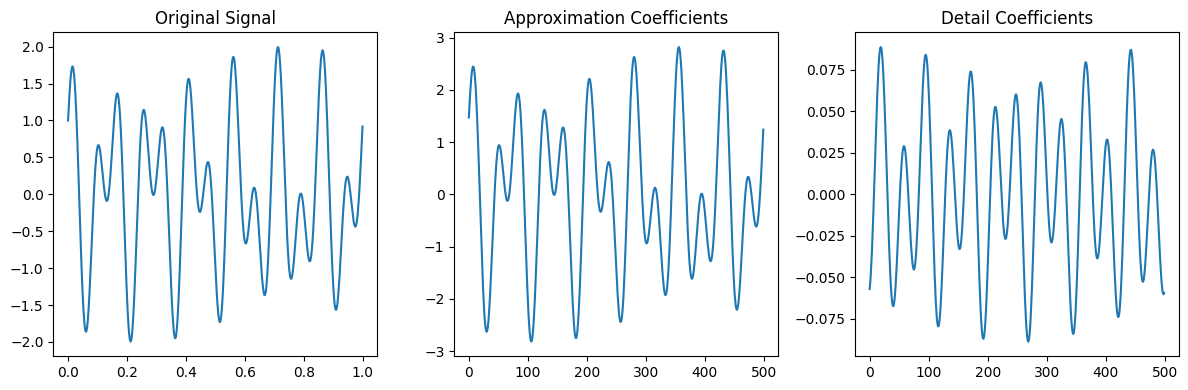

In [2]:
# Generate the signal
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.cos(2.0 * np.pi * 7 * t) + np.sin(2.0 * np.pi * 13 * t)

# Apply DWT
coeffs = pywt.dwt(signal, 'db1')
cA, cD = coeffs

# Plotting
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(t, signal)
plt.title("Original Signal")
plt.subplot(1, 3, 2)
plt.plot(cA)
plt.title("Approximation Coefficients")
plt.subplot(1, 3, 3)
plt.plot(cD)
plt.title("Detail Coefficients")
plt.tight_layout()
plt.show()

# 2. Visualizing Wavelet Transform of a Non-Stationary Signal
Now, consider a signal that has a changing frequency over time. We'll use the CWT for a richer representation.

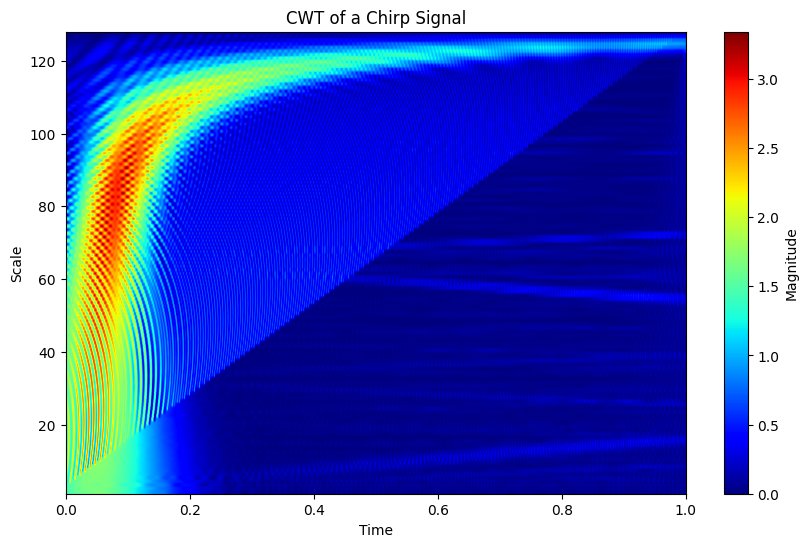

In [10]:
# Generate a chirp signal
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2.0 * np.pi * 70 * t * t)

# Apply CWT
coefficients, frequencies = pywt.cwt(signal, scales=np.arange(1, 128), wavelet='cmor')

# Plotting
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), aspect='auto', cmap='jet', extent=[0, 1, 1, 128])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT of a Chirp Signal")
plt.show()

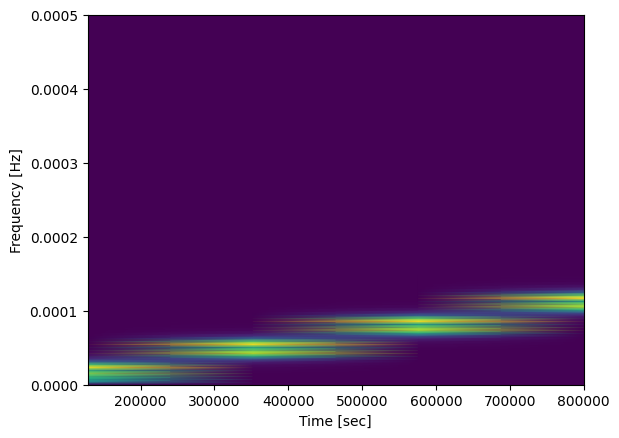

In [11]:
import numpy as np
import scipy.signal as sig
from scipy.fft import fftshift
import matplotlib.pyplot as plt

f, t, Sxx = sig.spectrogram(signal, 1/1000)

plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# 3. Denoising a Signal

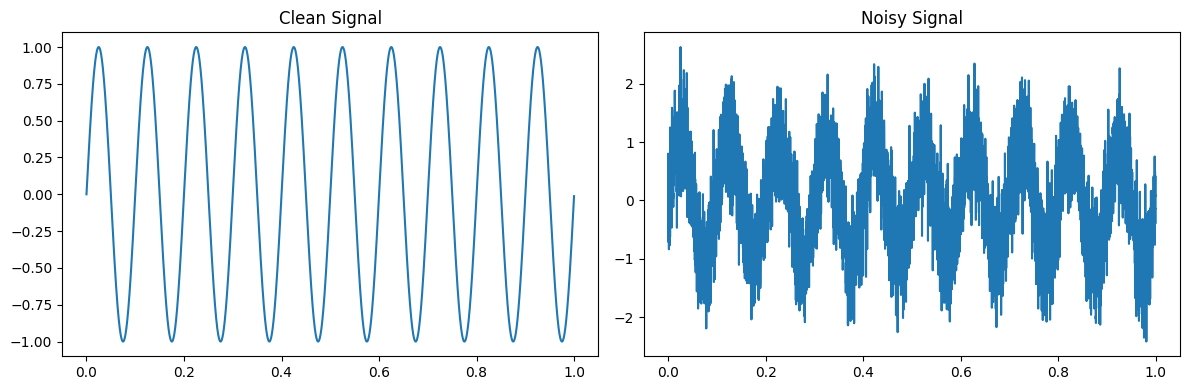

In [61]:
# Generate a simple sinusoidal signal
t = np.linspace(0, 1, 5000, endpoint=False)
clean_signal = np.sin(2.0 * np.pi * 10 * t)

# Add random noise
noise = np.random.normal(0, 0.5, clean_signal.shape)
noisy_signal = clean_signal + noise

# Plotting the clean and noisy signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, clean_signal)
plt.title("Clean Signal")
plt.subplot(1, 2, 2)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.tight_layout()
plt.show()

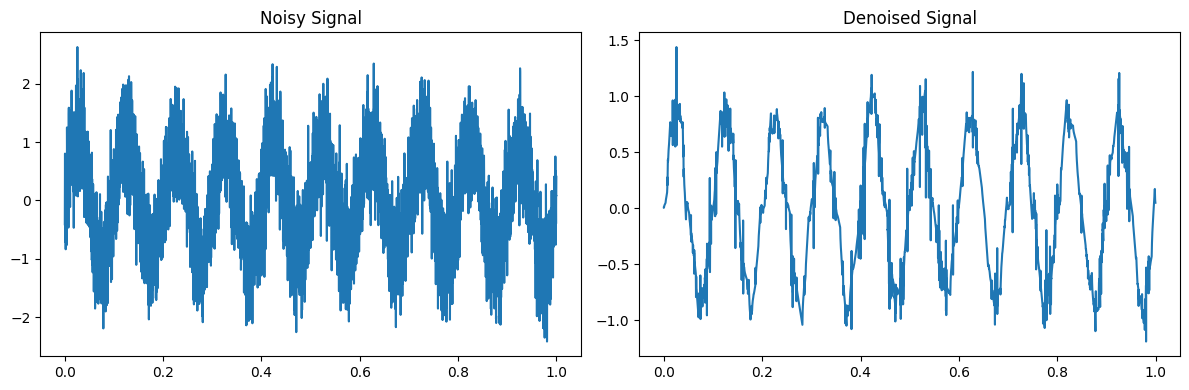

In [71]:
# Perform a multi-level wavelet decomposition
coeffs = pywt.wavedec(noisy_signal, 'sym2', level=5)

# Set a threshold to nullify smaller coefficients (assumed to be noise)
threshold = 0.95
coeffs_thresholded = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]

# Reconstruct the signal from the thresholded coefficients
denoised_signal = pywt.waverec(coeffs_thresholded, 'sym2')

# Plotting the noisy and denoised signals
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal)
plt.title("Noisy Signal")
plt.subplot(1, 2, 2)
plt.plot(t, denoised_signal)
plt.title("Denoised Signal")
plt.tight_layout()
plt.show()



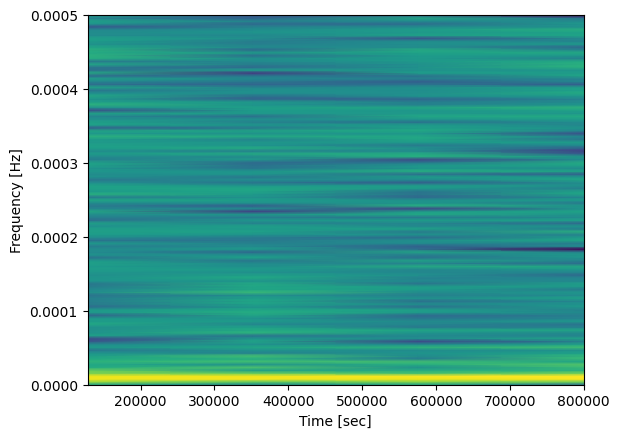

In [36]:
f, t, Sxx = sig.spectrogram(denoised_signal, 1/1000)

plt.pcolormesh(t, f, 10.*np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [28]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


# 4. Image Compression using Wavelet Transform

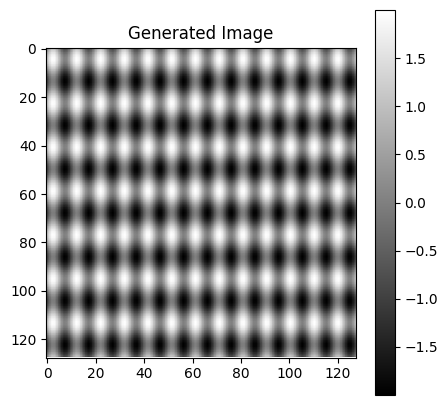

In [6]:
# Generate a simple 2D image
x, y = np.mgrid[0:1:128j, 0:1:128j]
img = np.sin(2.0 * np.pi * 7 * x) + np.sin(2.0 * np.pi * 13 * y)

# Plotting the generated image
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title("Generated Image")
plt.colorbar()
plt.show()

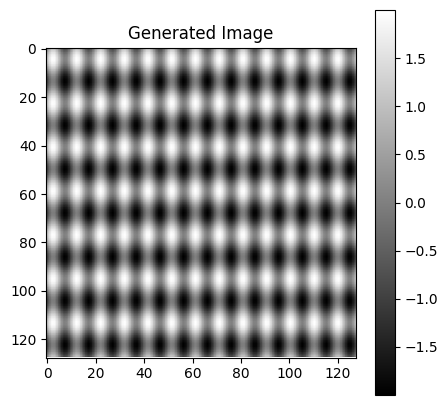

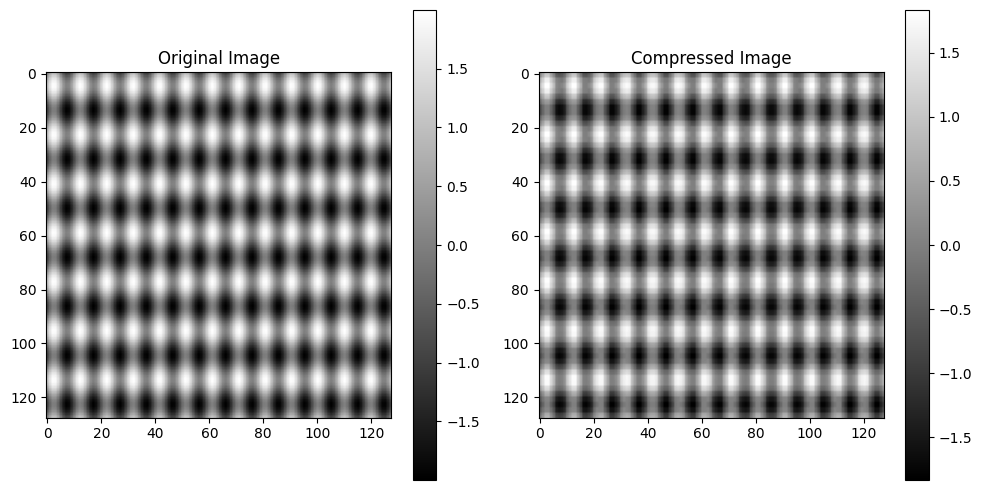

Erro Médio quadrático: 0.02530999703732139


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Gerar uma imagem 2D simples
x, y = np.mgrid[0:1:128j, 0:1:128j]
img = np.sin(2.0 * np.pi * 7 * x) + np.sin(2.0 * np.pi * 13 * y)

# Plotar a imagem gerada
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title("Generated Image")
plt.colorbar()
plt.show()

# Calcular a DWT da imagem
coeffs2 = pywt.dwt2(img, 'haar')

# Limiarizar os coeficientes
threshold = 0.2  # Defina seu próprio limite aqui
coeffs2_thresholded = [pywt.threshold(c, threshold, mode='soft') for c in coeffs2]

# Reconstruir a imagem comprimida
compressed_img = pywt.idwt2(coeffs2_thresholded, 'haar')

# Plotar as imagens original e comprimida
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(compressed_img, cmap='gray')
plt.title("Compressed Image")
plt.colorbar()
plt.tight_layout()
plt.show()

print(f'Erro Médio quadrático: {np.square(np.subtract(img, compressed_img)).mean()}')

# 5. Edge Detection in Images using Wavelet Transform

Wavelet Transform can also be used for edge detection in images due to its ability to capture high-frequency changes. We'll use scikit-image library to get a "standard" image for our edge detection tests.

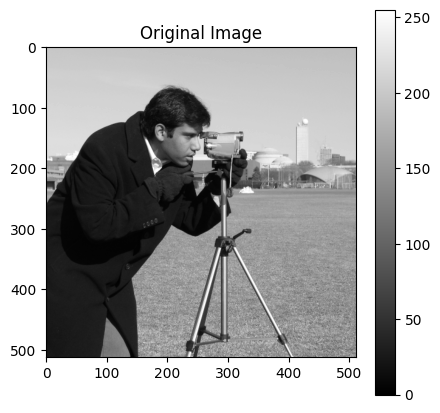

In [45]:
from skimage import data

# Use a built-in image from scikit-image as an example
img_photo = data.camera()

# Plotting the original image
plt.figure(figsize=(5, 5))
plt.imshow(img_photo, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.show()

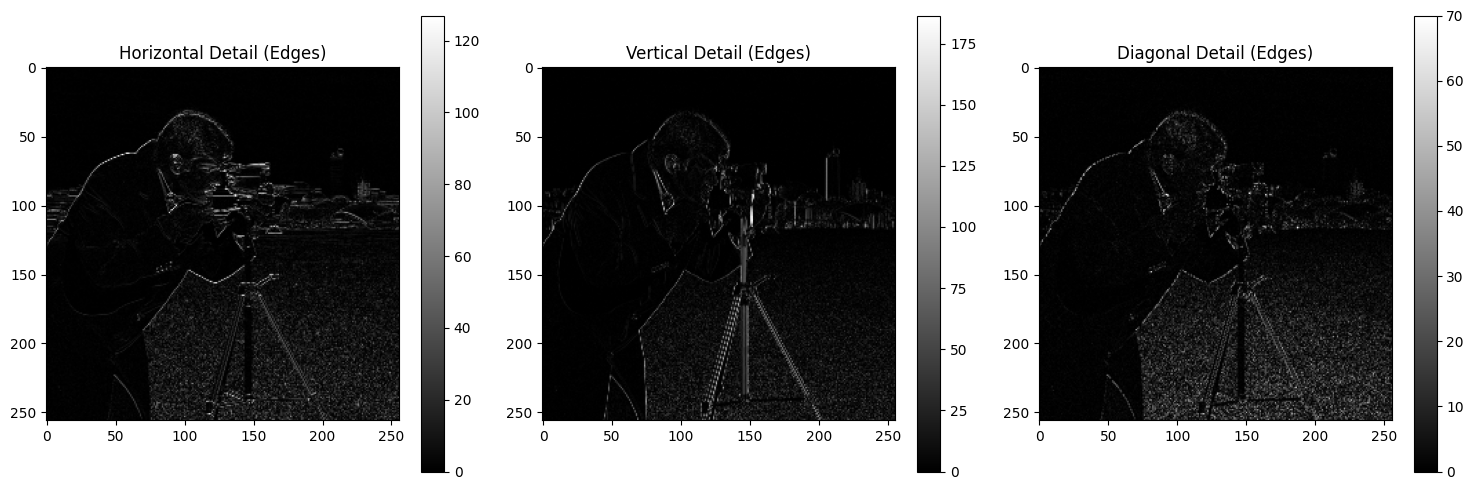

In [46]:
# Perform a 2D wavelet decomposition on the image
coeffs_photo = pywt.wavedec2(img_photo, 'db1', level=1)
cA_photo, (cH_photo, cV_photo, cD_photo) = coeffs_photo

# Plotting the detail coefficients (edges)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(cH_photo), cmap='gray')
plt.title("Horizontal Detail (Edges)")
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(np.abs(cV_photo), cmap='gray')
plt.title("Vertical Detail (Edges)")
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(np.abs(cD_photo), cmap='gray')
plt.title("Diagonal Detail (Edges)")
plt.colorbar()
plt.tight_layout()
plt.show()

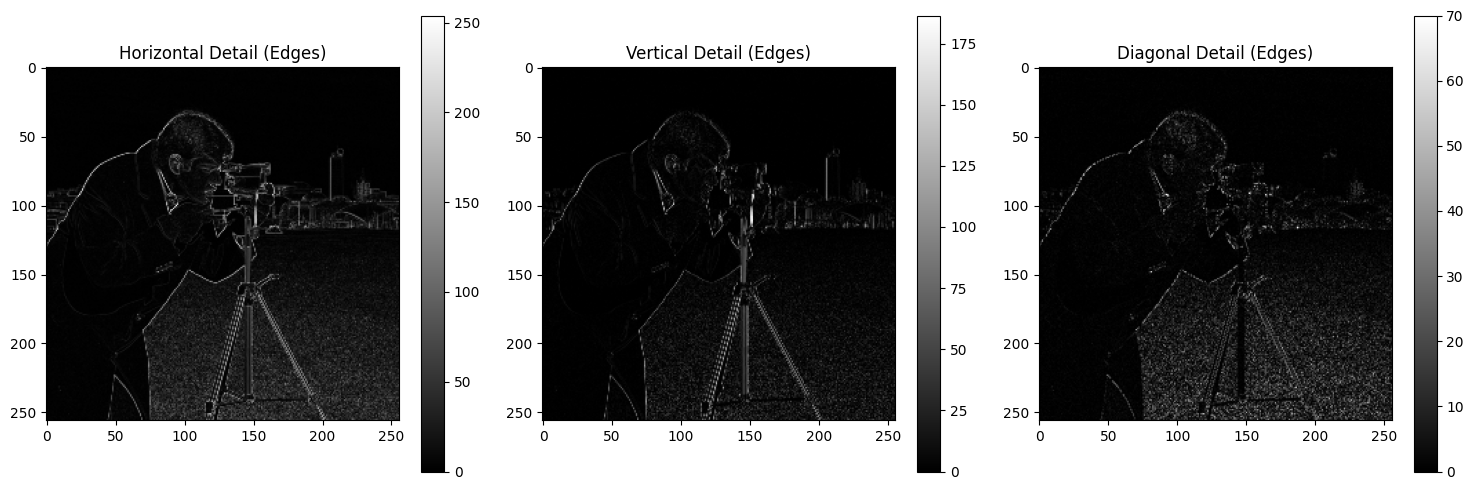

In [47]:
# Perform a 2D wavelet decomposition on the image
coeffs_photo = pywt.wavedec2(img_photo, 'db1', level=1)
cA_photo, (cH_photo, cV_photo, cD_photo) = coeffs_photo

# Plotting the detail coefficients (edges)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(np.abs(cH_photo)+np.abs(cV_photo)+np.abs(cD_photo), cmap='gray')
plt.title("Horizontal Detail (Edges)")
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(np.abs(cV_photo), cmap='gray')
plt.title("Vertical Detail (Edges)")
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(np.abs(cD_photo), cmap='gray')
plt.title("Diagonal Detail (Edges)")
plt.colorbar()
plt.tight_layout()
plt.show()

# 6. Visualizing several Discrete and Continuous wavelets

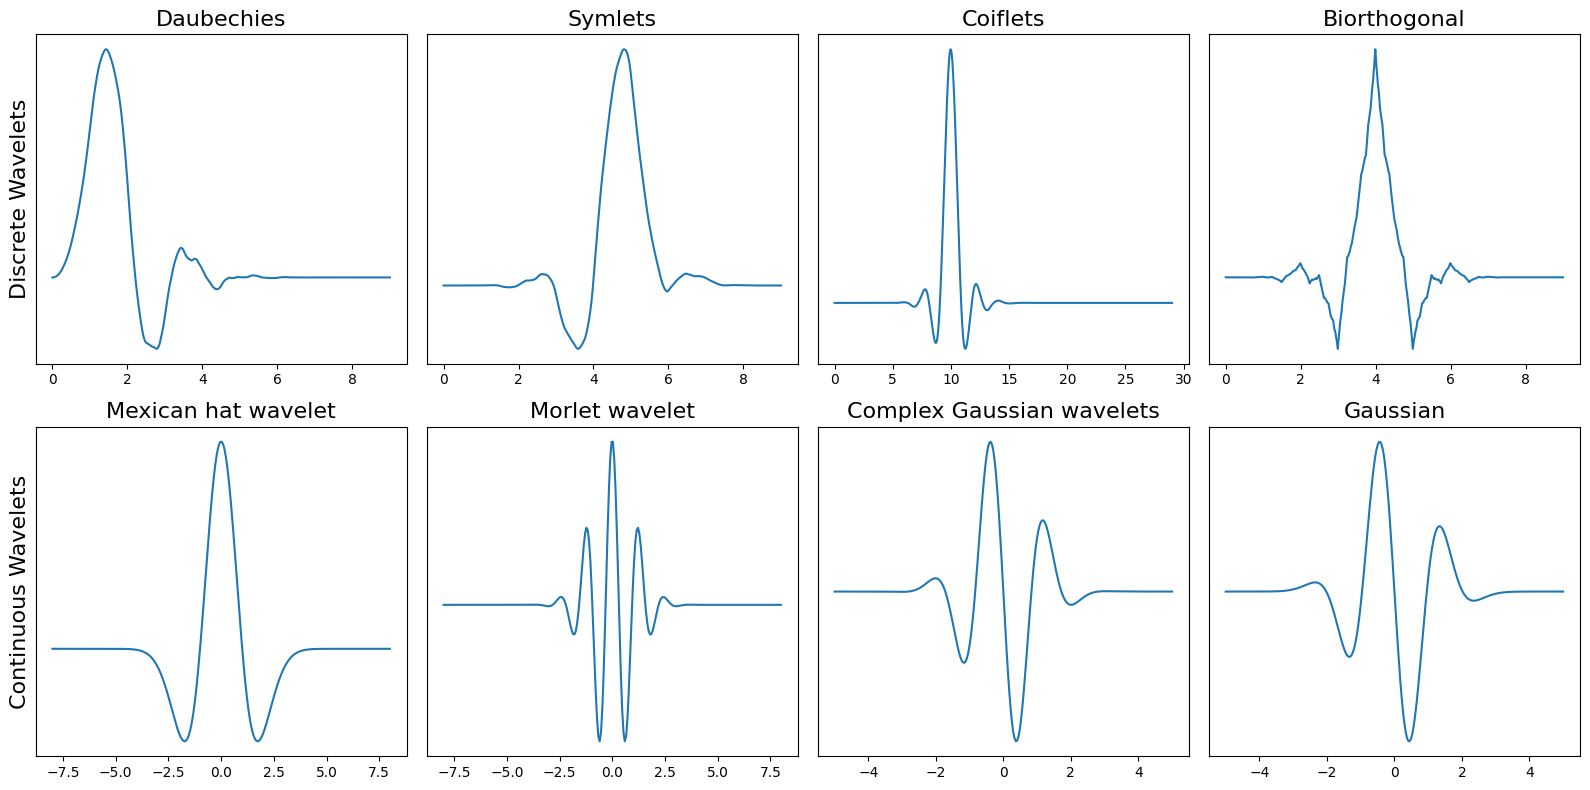

In [4]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

# 7. Visualizing how the wavelet form depends on the order and decomposition level

Within each wavelet family there can be a lot of different wavelet subcategories belonging to that family. You can distinguish the different subcategories of wavelets by the number of coefficients (the **number of vanishing moments**) and the **level of decomposition**.

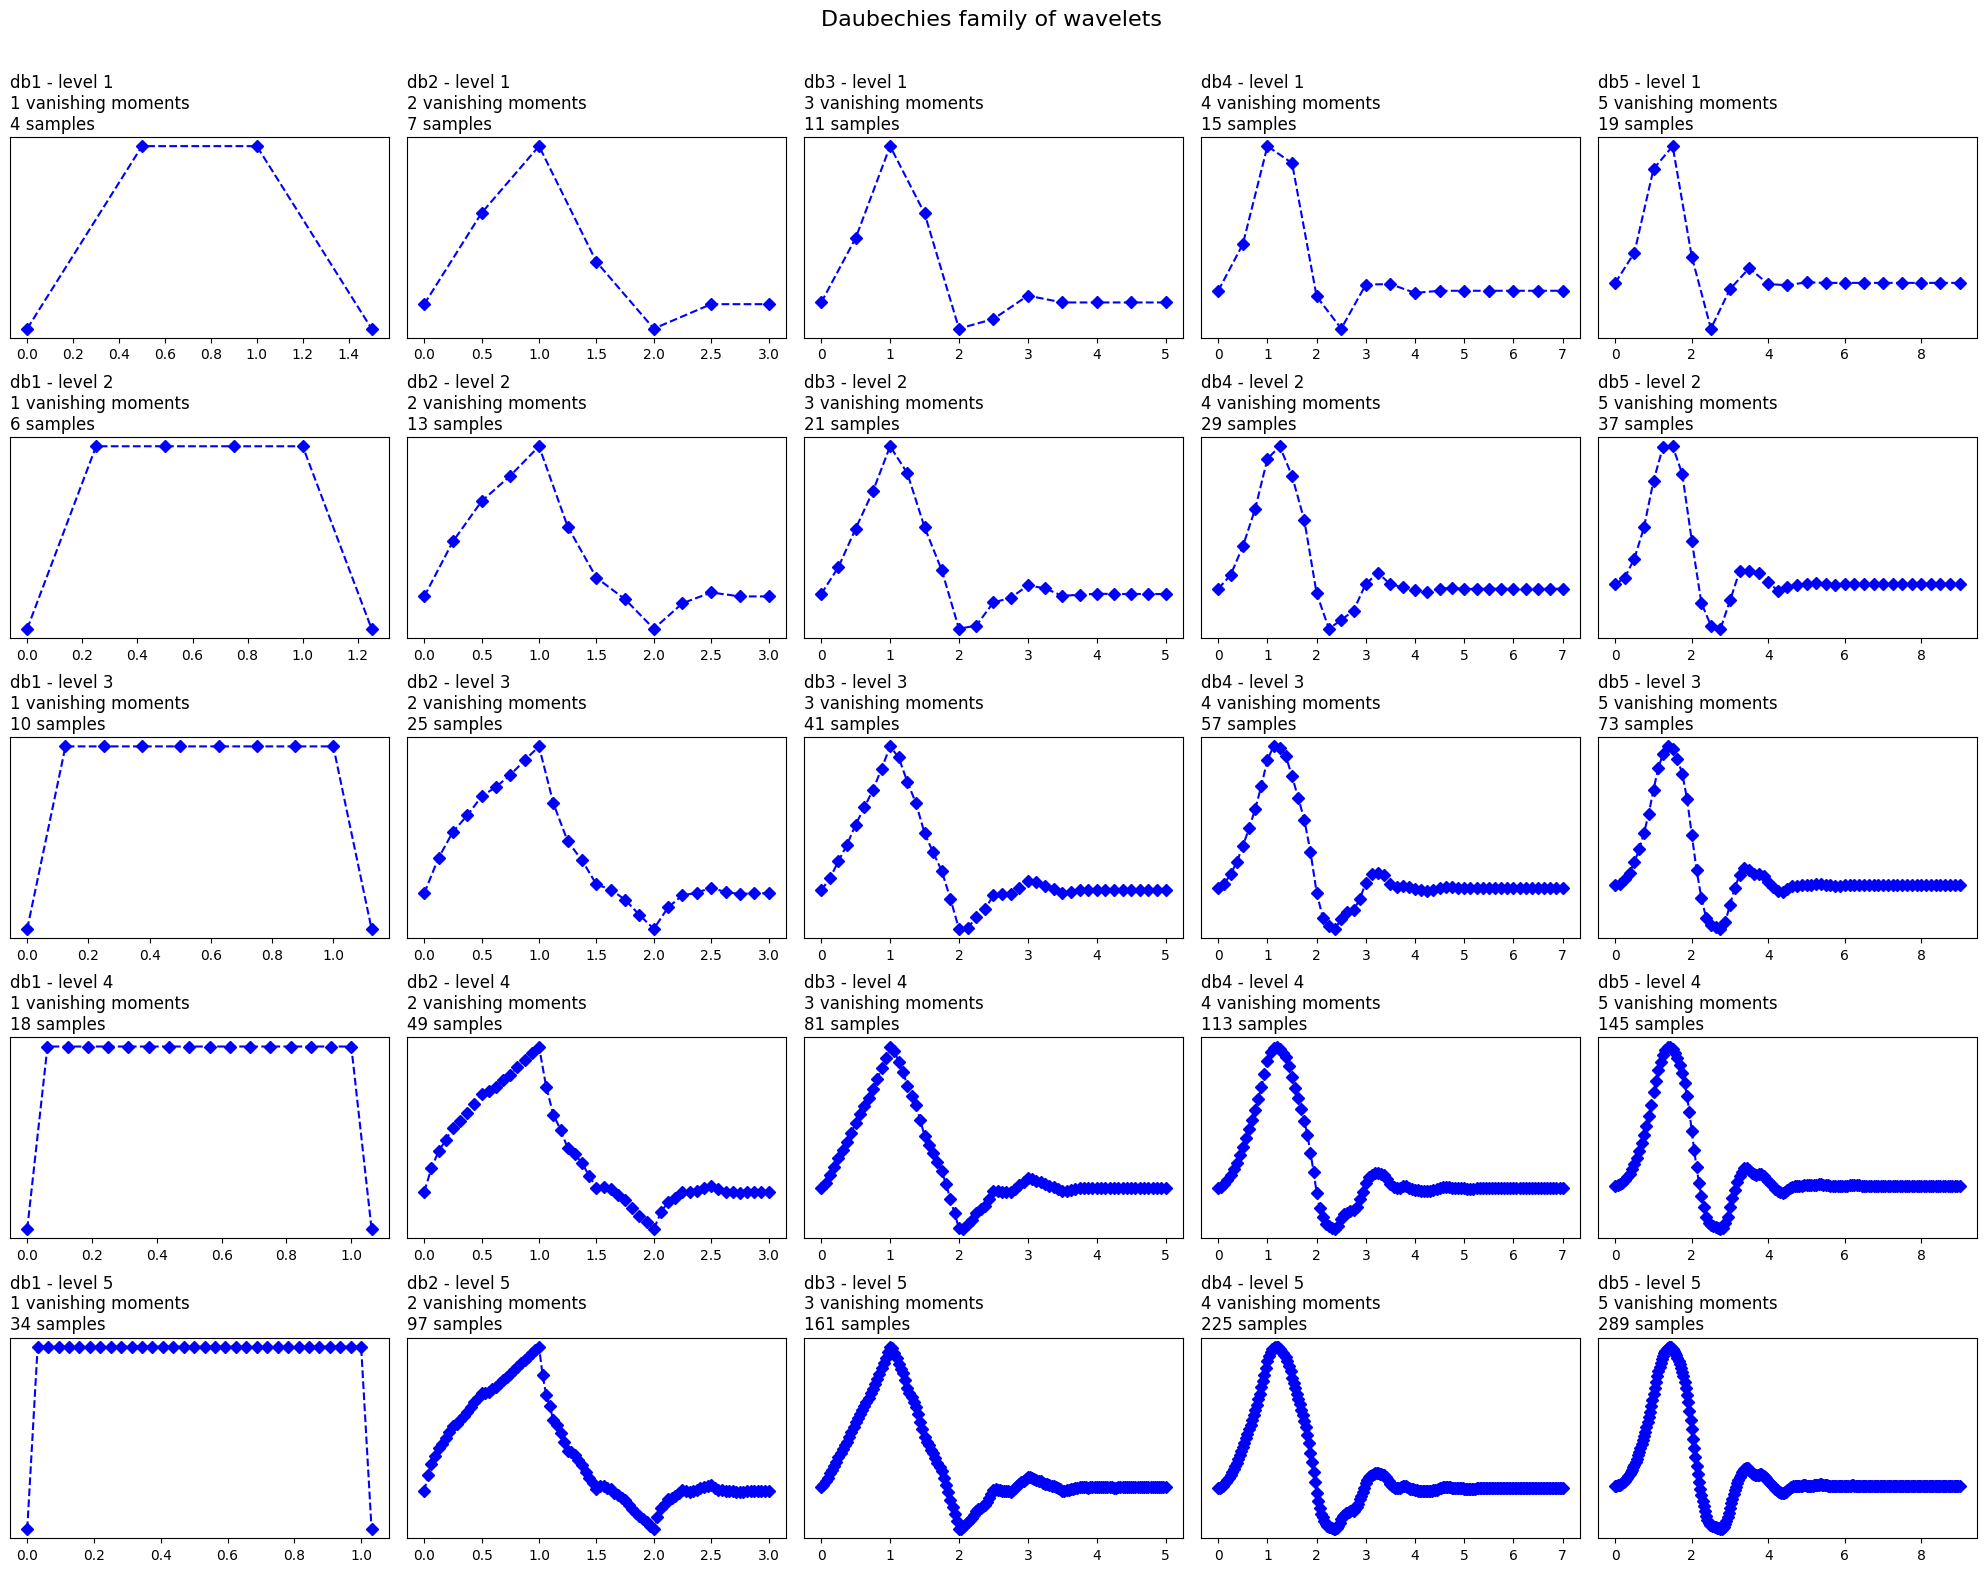

In [6]:
fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)

db_wavelets = pywt.wavelist('db')[:5]
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# 8. More on the Discrete Wavelet Transform: The DWT as a filter-bank

This means that we first analyze high frequency behavior. At the second stage, the scale **increases with a factor of two (the frequency decreases with a factor of two)**, and we are analyzing behavior around half of the maximum frequency. At the third stage, the scale factor is four and we are analyzing frequency behavior around a quarter of the maximum frequency. And this goes on and on, until we have reached the maximum decomposition level.

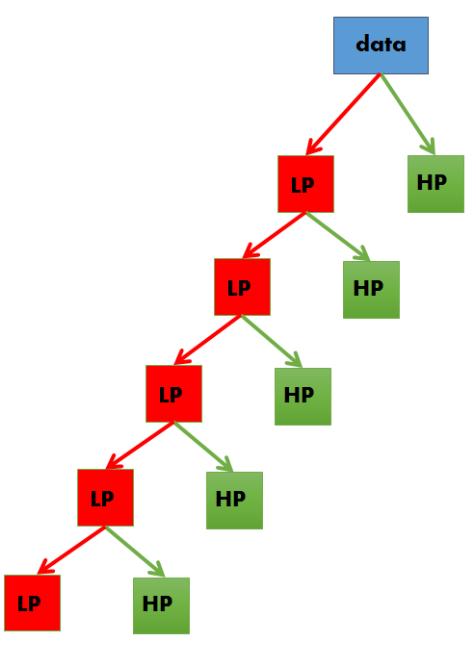

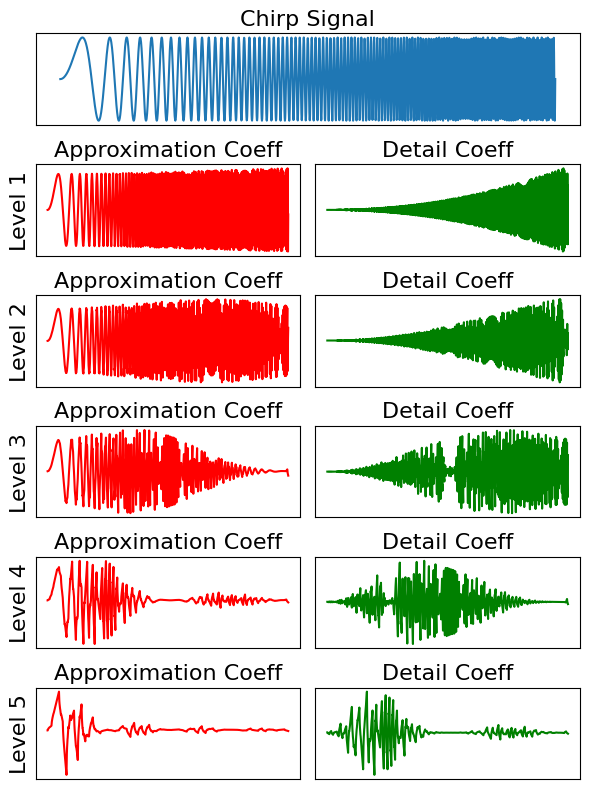

In [9]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6,8))
spec = gridspec.GridSpec(ncols=2, nrows=6)
ax0 = fig.add_subplot(spec[0, 0:2])
ax1a = fig.add_subplot(spec[1, 0])
ax1b = fig.add_subplot(spec[1, 1])
ax2a = fig.add_subplot(spec[2, 0])
ax2b = fig.add_subplot(spec[2, 1])
ax3a = fig.add_subplot(spec[3, 0])
ax3b = fig.add_subplot(spec[3, 1])
ax4a = fig.add_subplot(spec[4, 0])
ax4b = fig.add_subplot(spec[4, 1])
ax5a = fig.add_subplot(spec[5, 0])
ax5b = fig.add_subplot(spec[5, 1])
axarr = np.array([[ax1a, ax1b],[ax2a, ax2b],[ax3a, ax3b],[ax4a, ax4b],[ax5a, ax5b]])

time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * time**2)


# First we reconstruct a signal using pywt.wavedec() as we have also done at #4.2
coefficients_level1 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=4)
coefficients_level5 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=5)

# pywt.wavedec() returns a list of coefficients. Below we assign these list of coefficients to variables explicitely.
[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2
[cA3_l3, cD3_l3, cD2_l3, cD1_l3] = coefficients_level3
[cA4_l4, cD4_l4, cD3_l4, cD2_l4, cD1_l4] = coefficients_level4
[cA5_l5, cD5_l5, cD4_l5, cD3_l5, cD2_l5, cD1_l5] = coefficients_level5

# Since the the list of coefficients have been assigned explicitely to variables, we can set a few of them to zero.
approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

approx_coeff_level3_only = [cA3_l3, None, None, None]
detail_coeff_level3_only = [None, cD3_l3, None, None]

approx_coeff_level4_only = [cA4_l4, None, None, None, None]
detail_coeff_level4_only = [None, cD4_l4, None, None, None]

approx_coeff_level5_only = [cA5_l5, None, None, None, None, None]
detail_coeff_level5_only = [None, cD5_l5, None, None, None, None]


# By reconstrucing the signal back from only one set of coefficients, we can see how 
# the frequency-sub band for that specific set of coefficient looks like
rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, 'db2', 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, 'db2', 'smooth')

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, 'db2', 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, 'db2', 'smooth')

rec_signal_cA_level3 = pywt.waverec(approx_coeff_level3_only, 'db2', 'smooth')
rec_signal_cD_level3 = pywt.waverec(detail_coeff_level3_only, 'db2', 'smooth')

rec_signal_cA_level4 = pywt.waverec(approx_coeff_level4_only, 'db2', 'smooth')
rec_signal_cD_level4 = pywt.waverec(detail_coeff_level4_only, 'db2', 'smooth')

rec_signal_cA_level5 = pywt.waverec(approx_coeff_level5_only, 'db2', 'smooth')
rec_signal_cD_level5 = pywt.waverec(detail_coeff_level5_only, 'db2', 'smooth')


ax0.set_title("Chirp Signal", fontsize=16)
ax0.plot(time, chirp_signal)
ax0.set_xticks([])
ax0.set_yticks([])
ax1a.plot(rec_signal_cA_level1, color='red')
ax1b.plot(rec_signal_cD_level1, color='green')
ax2a.plot(rec_signal_cA_level2, color='red')
ax2b.plot(rec_signal_cD_level2, color='green')
ax3a.plot(rec_signal_cA_level3, color='red')
ax3b.plot(rec_signal_cD_level3, color='green')
ax4a.plot(rec_signal_cA_level4, color='red')
ax4b.plot(rec_signal_cD_level4, color='green')
ax5a.plot(rec_signal_cA_level5, color='red')
ax5b.plot(rec_signal_cD_level5, color='green')

for ii in range(0,5):
    axarr[ii,0].set_xticks([])
    axarr[ii,0].set_yticks([])
    axarr[ii,1].set_xticks([])
    axarr[ii,1].set_yticks([])
    axarr[ii,0].set_title("Approximation Coeff", fontsize=16)
    axarr[ii,1].set_title("Detail Coeff", fontsize=16)
    axarr[ii,0].set_ylabel("Level {}".format(ii+1), fontsize=16)
plt.tight_layout()
plt.show()

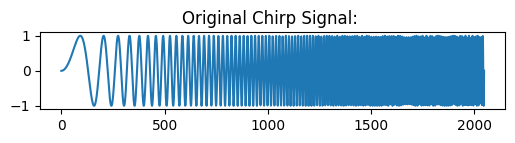

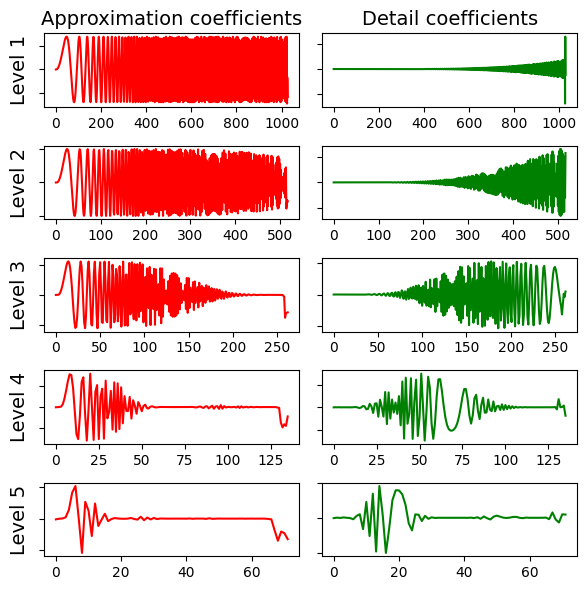

In [4]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

# 9. Visualizing the State-Space using the Continuous Wavelet Transform

In [72]:
import os
import pywt
#from wavelets.wave_python.waveletFunctions import *
import itertools
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

### Load the el-Nino time-series dataset

In [73]:
dataset = "https://raw.githubusercontent.com/taspinar/siml/master/datasets/sst_nino3.dat.txt"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()

In [76]:
print(time)

[1871.   1871.25 1871.5  1871.75 1872.   1872.25 1872.5  1872.75 1873.
 1873.25 1873.5  1873.75 1874.   1874.25 1874.5  1874.75 1875.   1875.25
 1875.5  1875.75 1876.   1876.25 1876.5  1876.75 1877.   1877.25 1877.5
 1877.75 1878.   1878.25 1878.5  1878.75 1879.   1879.25 1879.5  1879.75
 1880.   1880.25 1880.5  1880.75 1881.   1881.25 1881.5  1881.75 1882.
 1882.25 1882.5  1882.75 1883.   1883.25 1883.5  1883.75 1884.   1884.25
 1884.5  1884.75 1885.   1885.25 1885.5  1885.75 1886.   1886.25 1886.5
 1886.75 1887.   1887.25 1887.5  1887.75 1888.   1888.25 1888.5  1888.75
 1889.   1889.25 1889.5  1889.75 1890.   1890.25 1890.5  1890.75 1891.
 1891.25 1891.5  1891.75 1892.   1892.25 1892.5  1892.75 1893.   1893.25
 1893.5  1893.75 1894.   1894.25 1894.5  1894.75 1895.   1895.25 1895.5
 1895.75 1896.   1896.25 1896.5  1896.75 1897.   1897.25 1897.5  1897.75
 1898.   1898.25 1898.5  1898.75 1899.   1899.25 1899.5  1899.75 1900.
 1900.25 1900.5  1900.75 1901.   1901.25 1901.5  1901.75 1902.

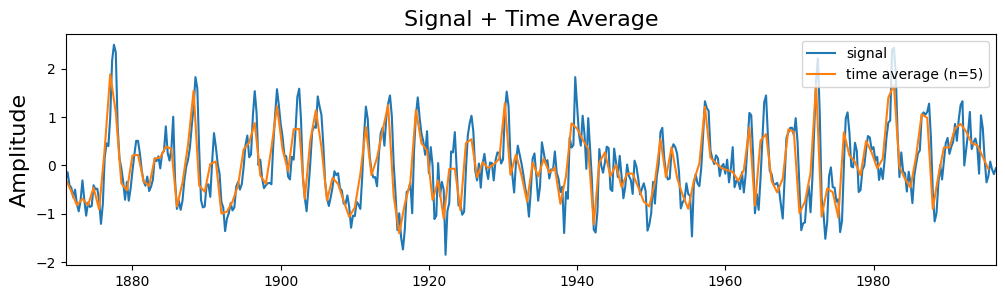

In [13]:
# First lets load the el-Nino dataset, and plot it together with its time-average

def get_ave_values(xvalues, yvalues, n = 5):
    signal_length = len(xvalues)
    if signal_length % n == 0:
        padding_length = 0
    else:
        padding_length = n - signal_length//n % n
    xarr = np.array(xvalues)
    yarr = np.array(yvalues)
    xarr.resize(signal_length//n, n)
    yarr.resize(signal_length//n, n)
    xarr_reshaped = xarr.reshape((-1,n))
    yarr_reshaped = yarr.reshape((-1,n))
    x_ave = xarr_reshaped[:,0]
    y_ave = np.nanmean(yarr_reshaped, axis=1)
    return x_ave, y_ave

def plot_signal_plus_average(ax, time, signal, average_over = 5):
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Amplitude', fontsize=16)
    ax.set_title('Signal + Time Average', fontsize=16)
    ax.legend(loc='upper right')

fig, ax = plt.subplots(figsize=(12,3))
plot_signal_plus_average(ax, time, signal, average_over = 3)
plt.show()

### Plot the Fourier Transform of the el-Nino dataset

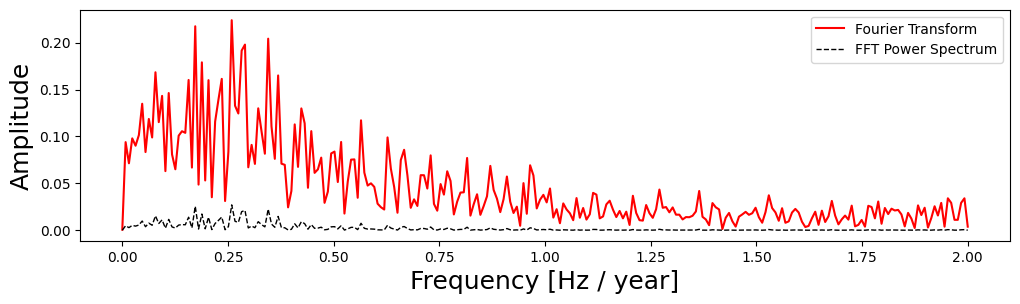

In [14]:
def get_fft_values(y_values, T, N, f_s):
    N2 = 2 ** (int(np.log2(N)) + 1) # round up to next highest power of 2
    f_values = np.linspace(0.0, 1.0/(2.0*T), N2//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N2 * np.abs(fft_values_[0:N2//2])
    return f_values, fft_values

def plot_fft_plus_power(ax, time, signal, plot_direction='horizontal', yticks=None, ylim=None):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2
    if plot_direction == 'horizontal':
        ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
        ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    elif plot_direction == 'vertical':
        scales = 1./f_values
        scales_log = np.log2(scales)
        ax.plot(fft_values, scales_log, 'r-', label='Fourier Transform')
        ax.plot(fft_power, scales_log, 'k--', linewidth=1, label='FFT Power Spectrum')
        ax.set_yticks(np.log2(yticks))
        ax.set_yticklabels(yticks)
        ax.invert_yaxis()
        ax.set_ylim(ylim[0], -1)
    ax.legend()

fig, ax = plt.subplots(figsize=(12,3))
ax.set_xlabel('Frequency [Hz / year]', fontsize=18)
ax.set_ylabel('Amplitude', fontsize=18)
plot_fft_plus_power(ax, time, signal)
plt.show()

### Plot the Scaleogram using the Continuous Wavelet Transform

/home/marcosgnr/.local/lib/python3.10/site-packages/pywt/_cwt.py:121: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


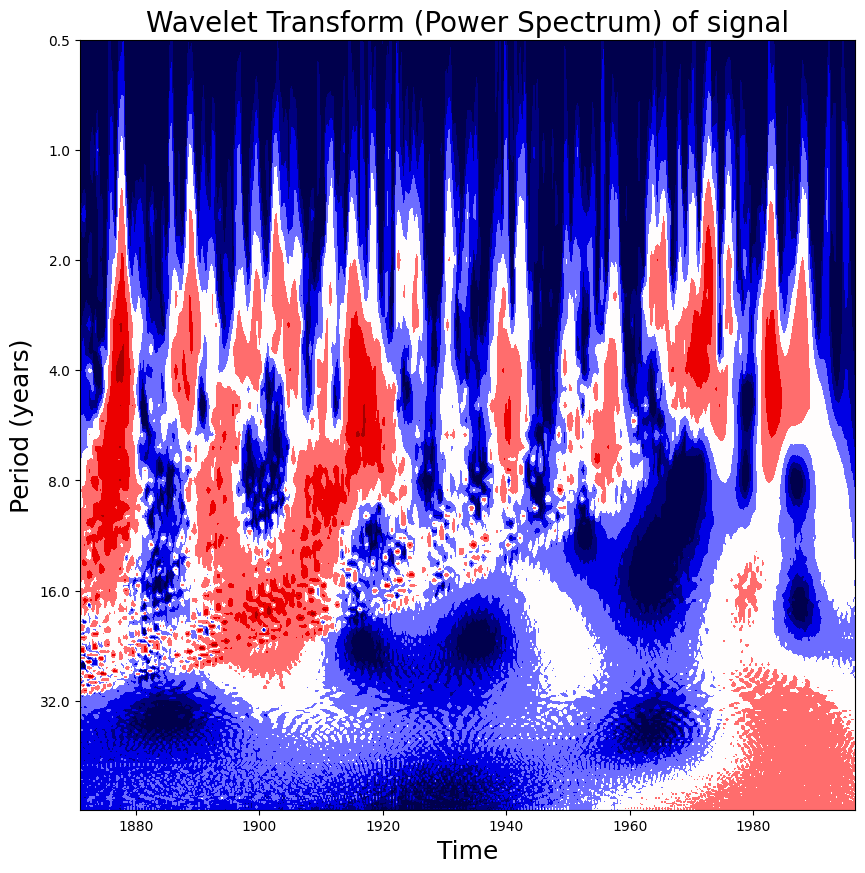

In [15]:
def plot_wavelet(ax, time, signal, scales, waveletname = 'cmor', 
                 cmap = plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    return yticks, ylim

scales = np.arange(1, 128)
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (years)'
xlabel = 'Time'

fig, ax = plt.subplots(figsize=(10, 10))
plot_wavelet(ax, time, signal, scales, xlabel=xlabel, ylabel=ylabel, title=title)
plt.show()

### Plot all of the above in one figure

/tmp/ipykernel_8641/1361905880.py:20: RuntimeWarning: divide by zero encountered in divide
  scales = 1./f_values


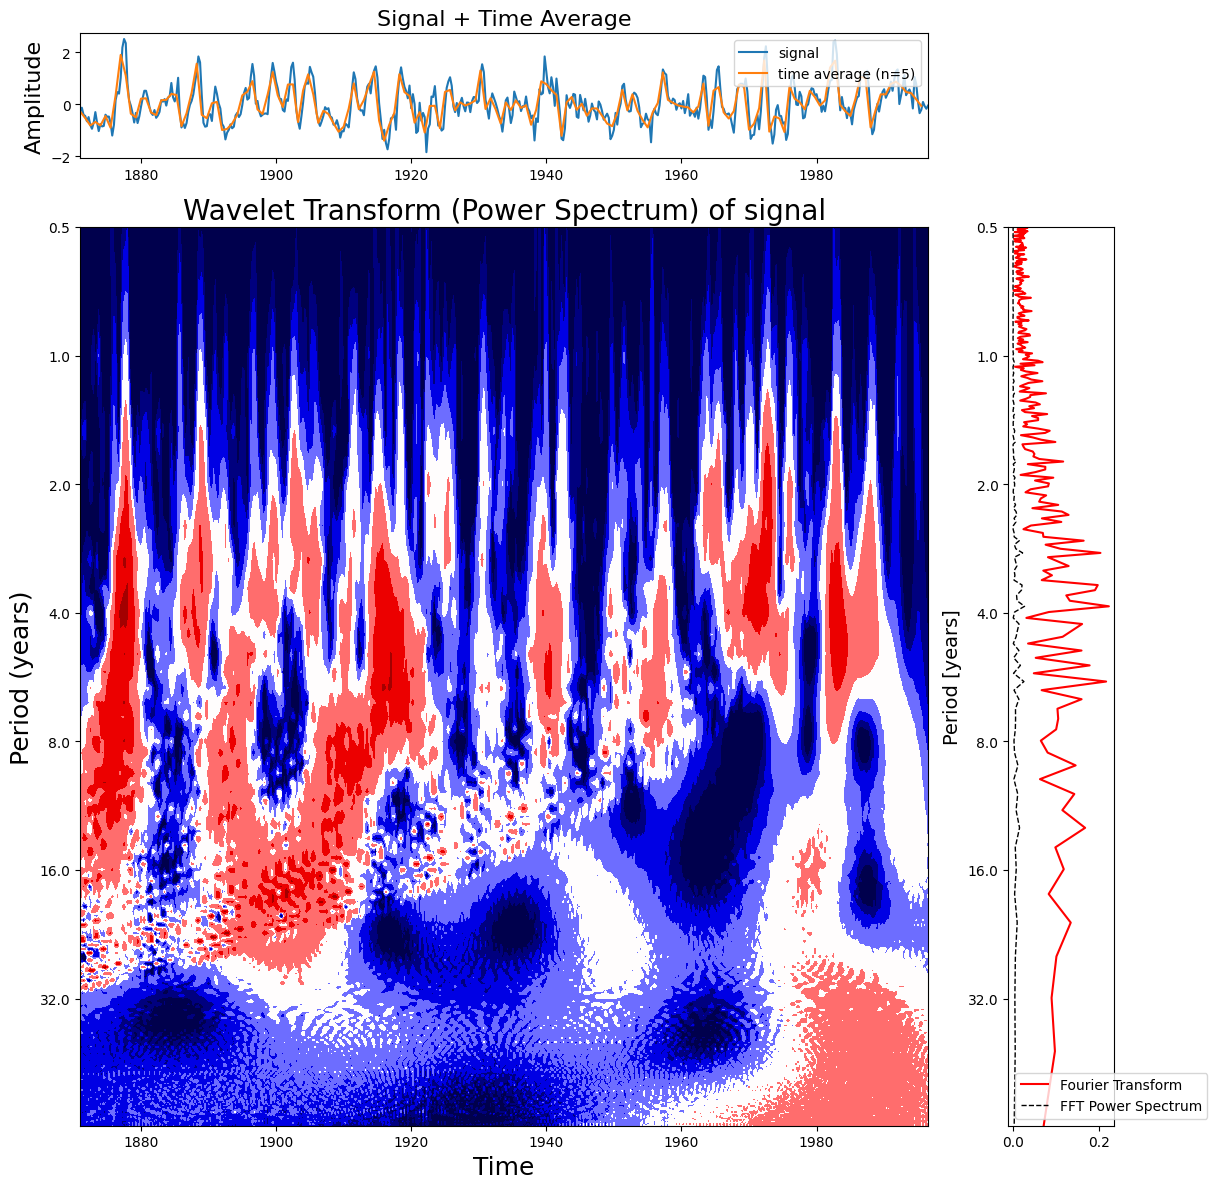

In [16]:
fig = plt.figure(figsize=(12,12))
spec = gridspec.GridSpec(ncols=6, nrows=6)
top_ax = fig.add_subplot(spec[0, 0:5])
bottom_left_ax = fig.add_subplot(spec[1:, 0:5])
bottom_right_ax = fig.add_subplot(spec[1:, 5])

plot_signal_plus_average(top_ax, time, signal, average_over = 3)
yticks, ylim = plot_wavelet(bottom_left_ax, time, signal, scales, xlabel=xlabel, ylabel=ylabel, title=title)

plot_fft_plus_power(bottom_right_ax, time, signal, plot_direction='vertical', yticks=yticks, ylim=ylim)
bottom_right_ax.set_ylabel('Period [years]', fontsize=14)
plt.tight_layout()
plt.show()

# EWT -  Empirical Wavelet Transform

## Comparison: Wavelet Transform vs. Empirical Wavelet Transform

The choice between the Wavelet Transform and the Empirical Wavelet Transform (EWT) depends heavily on the type of signal you are analyzing and the goals of the analysis. There is no definitive answer to which one is "better," as each has its own advantages and suitable applications:

1. **Wavelet Transform**:
   - **Advantages**:
     - Wide range of applications across various domains, including signal processing, image processing, data compression, among others.
     - Well-established, with many implementations and tools available.
     - Useful for analyzing stationary signals at different time and frequency scales.
   - **Limitations**:
     - Less suitable for non-stationary signals, where EWT may be more effective.
     - Requires the choice of an appropriate wavelet basis, which can be challenging in some situations.

2. **Empirical Wavelet Transform**:
   - **Advantages**:
     - Efficient for analyzing non-stationary signals, where statistical and spectral characteristics change over time.
     - Does not require the prior choice of a wavelet basis, as wavelet functions are adaptively determined from the data.
     - Can accurately capture edges, oscillations, and other local features of the signal.
   - **Limitations**:
     - Less widely used and less established than traditional Wavelet Transform.
     - Can be computationally more intensive in certain cases, especially for high-dimensional signals.

Therefore, the choice between the Wavelet Transform and the Empirical Wavelet Transform depends on the nature of your signal and the goals of your analysis. If you are working with stationary signals and seeking a general analysis at different time and frequency scales, the traditional Wavelet Transform may be more suitable. On the other hand, if you are dealing with non-stationary signals and seeking an adaptive and localized analysis, the Empirical Wavelet Transform may be more 
signals.

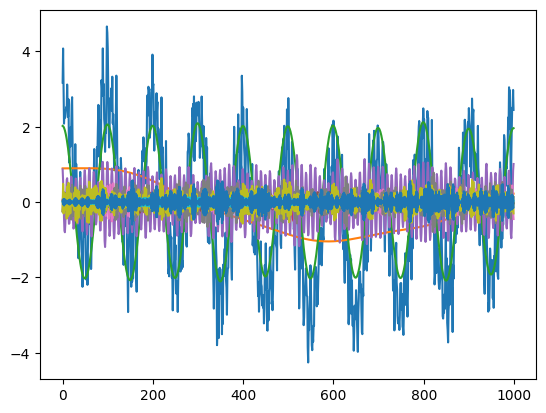

In [87]:
#%% Example script
import numpy as np
import matplotlib.pyplot as plt
import ewtpy

T = 1000
t = np.arange(1,T+1)/T

noise = np.random.normal(0, 0.5, t.shape)
f = np.cos(2*np.pi*0.8*t) + 2*np.cos(2*np.pi*10*t)+0.8*np.cos(2*np.pi*100*t) + noise
ewt,  mfb ,boundaries = ewtpy.EWT1D(f, N = 10)
plt.plot(f)
plt.plot(ewt)


# Artigo utilizado: Wavelet+LSTM

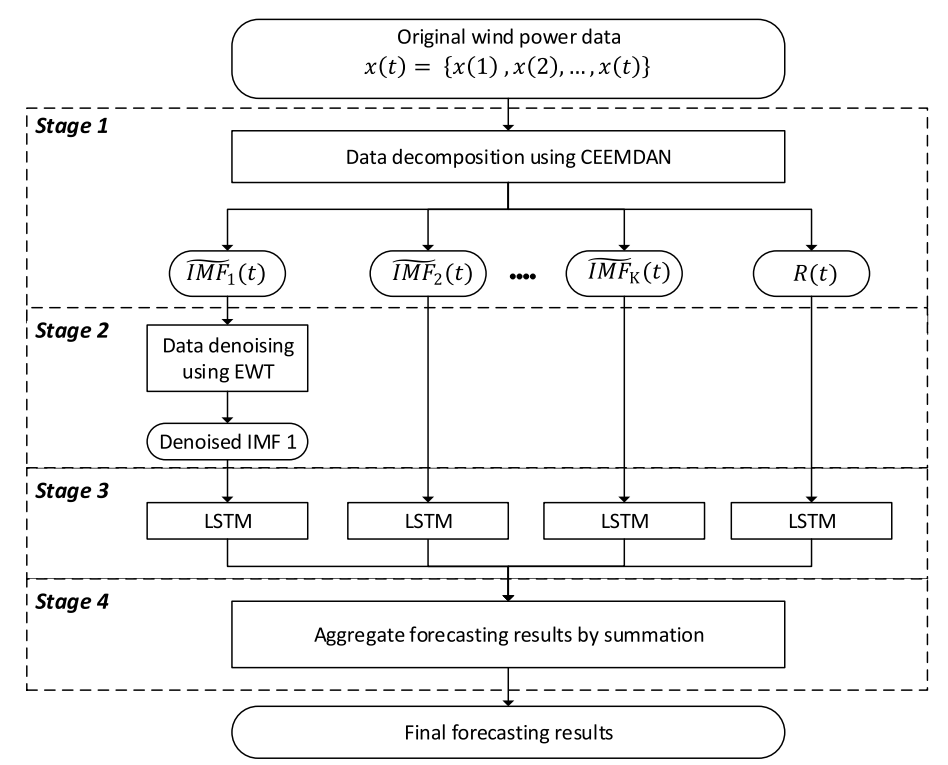

# 10. Using the Continuous Wavelet Transform and a Convolutional Neural Network for classification of signals

Place the nine scaleograms on top of each other and **create one single image with nine channels**. What does this mean? Well, normally an image has either one channel (grayscale image) or three channels (color image), but our CNN can just as easily handle images with nine channels. The way the CNN works remains exactly the same, the only difference is that there will be three times more filters compared to an RGB image.

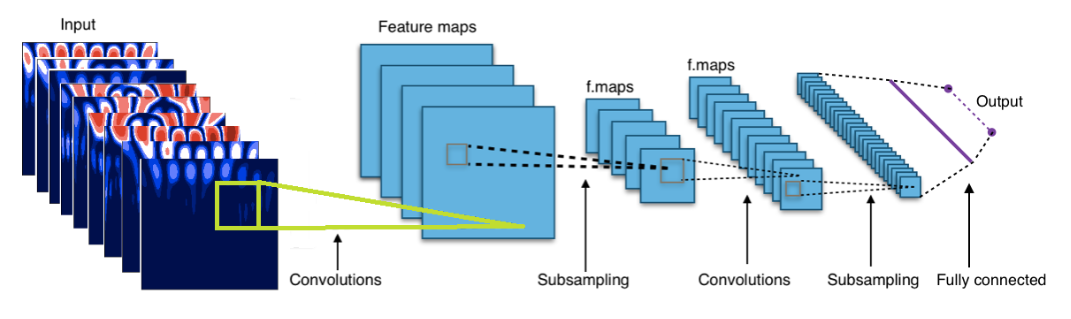

In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 
history = History()

2024-04-03 10:37:39.893018: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 10:37:39.965359: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 10:37:40.293218: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 10:37:40.293273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 10:37:40.345328: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

### Loading the UCI HAR dataset into an numpy ndarray

In [2]:
activities_description = {
    1: 'walking',
    2: 'walking upstairs',
    3: 'walking downstairs',
    4: 'sitting',
    5: 'standing',
    6: 'laying'
}

def read_signals(filename):
    with open(filename, 'r') as fp:
        data = fp.read().splitlines()
        data = map(lambda x: x.rstrip().lstrip().split(), data)
        data = [list(map(float, line)) for line in data]
    return data

def read_labels(filename):        
    with open(filename, 'r') as fp:
        activities = fp.read().splitlines()
        activities = list(map(lambda x: int(x)-1, activities))
    return activities

def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    shuffled_dataset = dataset[permutation, :, :]
    shuffled_labels = labels[permutation]
    return shuffled_dataset, shuffled_labels

INPUT_FOLDER_TRAIN = 'data/train/InertialSignals/'
INPUT_FOLDER_TEST = 'data/test/InertialSignals/'

INPUT_FILES_TRAIN = ['body_acc_x_train.txt', 'body_acc_y_train.txt', 'body_acc_z_train.txt', 
                     'body_gyro_x_train.txt', 'body_gyro_y_train.txt', 'body_gyro_z_train.txt',
                     'total_acc_x_train.txt', 'total_acc_y_train.txt', 'total_acc_z_train.txt']

INPUT_FILES_TEST = ['body_acc_x_test.txt', 'body_acc_y_test.txt', 'body_acc_z_test.txt', 
                     'body_gyro_x_test.txt', 'body_gyro_y_test.txt', 'body_gyro_z_test.txt',
                     'total_acc_x_test.txt', 'total_acc_y_test.txt', 'total_acc_z_test.txt']

LABELFILE_TRAIN = 'data/train/y_train.txt'
LABELFILE_TEST = 'data/test/y_test.txt'

train_signals, test_signals = [], []

for input_file in INPUT_FILES_TRAIN:
    signal = read_signals(INPUT_FOLDER_TRAIN + input_file)
    train_signals.append(signal)
train_signals = np.transpose(np.array(train_signals), (1, 2, 0))

for input_file in INPUT_FILES_TEST:
    signal = read_signals(INPUT_FOLDER_TEST + input_file)
    test_signals.append(signal)
test_signals = np.transpose(np.array(test_signals), (1, 2, 0))

train_labels = read_labels(LABELFILE_TRAIN)
test_labels = read_labels(LABELFILE_TEST)

[no_signals_train, no_steps_train, no_components_train] = np.shape(train_signals)
[no_signals_test, no_steps_test, no_components_test] = np.shape(test_signals)
no_labels = len(np.unique(train_labels[:]))

print("The train dataset contains {} signals, each one of length {} and {} components ".format(no_signals_train, no_steps_train, no_components_train))
print("The test dataset contains {} signals, each one of length {} and {} components ".format(no_signals_test, no_steps_test, no_components_test))
print("The train dataset contains {} labels, with the following distribution:\n {}".format(np.shape(train_labels)[0], Counter(train_labels[:])))
print("The test dataset contains {} labels, with the following distribution:\n {}".format(np.shape(test_labels)[0], Counter(test_labels[:])))

uci_har_signals_train, uci_har_labels_train = randomize(train_signals, np.array(train_labels))
uci_har_signals_test, uci_har_labels_test = randomize(test_signals, np.array(test_labels))

The train dataset contains 7352 signals, each one of length 128 and 9 components 
The test dataset contains 2947 signals, each one of length 128 and 9 components 
The train dataset contains 7352 labels, with the following distribution:
 Counter({5: 1407, 4: 1374, 3: 1286, 0: 1226, 1: 1073, 2: 986})
The test dataset contains 2947 labels, with the following distribution:
 Counter({5: 537, 4: 532, 0: 496, 3: 491, 1: 471, 2: 420})


### Applying a CWT to UCI HAR signals and saving the resulting scaleogram into an numpy ndarray

In [3]:
scales = range(1,128)
waveletname = 'morl'
train_size = 5000
train_data_cwt = np.ndarray(shape=(train_size, 127, 127, 9))

for ii in range(0,train_size):
    if ii % 1000 == 0:
        print(ii)
    for jj in range(0,9):
        signal = uci_har_signals_train[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:127]
        train_data_cwt[ii, :, :, jj] = coeff_

test_size = 500
test_data_cwt = np.ndarray(shape=(test_size, 127, 127, 9))
for ii in range(0,test_size):
    if ii % 100 == 0:
        print(ii)
    for jj in range(0,9):
        signal = uci_har_signals_test[ii, :, jj]
        coeff, freq = pywt.cwt(signal, scales, waveletname, 1)
        coeff_ = coeff[:,:127]
        test_data_cwt[ii, :, :, jj] = coeff_

0
1000
2000
3000
4000
0
100
200
300
400


### Training a Convolutional Neural Network

In [4]:
x_train = train_data_cwt
y_train = list(uci_har_labels_train[:train_size])
x_test = test_data_cwt
y_test = list(uci_har_labels_test[:test_size])
img_x = 127
img_y = 127
img_z = 9
num_classes = 6

batch_size = 16
epochs = 10

# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
input_shape = (img_x, img_y, img_z)

# convert the data to the right type
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, img_z)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, img_z)
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (5000, 127, 127, 9)
5000 train samples
500 test samples


### CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, 
          epochs=epochs, verbose=1, 
          validation_data=(x_test, y_test), 
          callbacks=[history])

train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

In [ ]:
fig, axarr = plt.subplots(figsize=(12,6), ncols=2)
axarr[0].plot(range(1, 11), history.history['acc'], label='train score')
axarr[0].plot(range(1, 11), history.history['val_acc'], label='test score')
axarr[0].set_xlabel('Number of Epochs', fontsize=18)
axarr[0].set_ylabel('Accuracy', fontsize=18)
axarr[0].set_ylim([0,1])
axarr[1].plot(range(1, 11), history.history['acc'], label='train score')
axarr[1].plot(range(1, 11), history.history['val_acc'], label='test score')
axarr[1].set_xlabel('Number of Epochs', fontsize=18)
axarr[1].set_ylabel('Accuracy', fontsize=18)
axarr[1].set_ylim([0.9,1])
plt.legend()
plt.show()